In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def calc_pathloss_params(fc, hb, hm, area_type="small_and_medium_size_cities"):
    """
    使用Okumura-Hata模型 https://www.wiley.com/legacy/wileychi/molisch/supp2/appendices/c07_Appendices.pdf
    默认参数计算出的数据 : A:110.2, B:33.8, C:0
    """
    if area_type == "small_and_medium_size_cities":
        C = 0
        ahm = (1.1*np.log10(fc)-0.7)*hm - (1.56*np.log10(fc)-0.8)
    else:
        if fc <= 200:
            ahm = 8.29*(np.log10(1.54*hm))**2 - 1.1
        else:
            ahm = 3.2*(np.log10(11.75*hm))**2 - 4.97
        if area_type == "metropolitan_areas":
            C = 0
        if area_type == "suburban_environments":
            C = -2*(np.log10(fc/28))**2 - 5.4
        if area_type == "rural_area":
            C = -4.78*(np.log10(fc))**2 + 18.33*np.log10(fc) - 40.98
    A = 69.55 + 26.16 * np.log10(fc) - 13.82 * np.log10(hb) - ahm
    B = 44.9 - 6.55 * np.log10(hb)
    return A, B, C

207.48470021774932 36.37825352840092 0


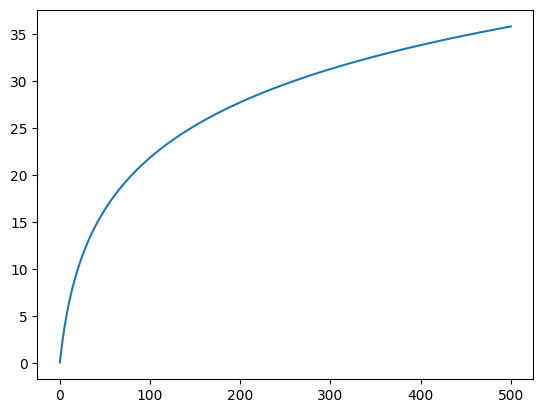

In [5]:
# A = 110.2
# B = 33.8
# C = 0

A, B, C = calc_pathloss_params(900*1e6, 20, 10,area_type="small_and_medium_size_cities")

def calc_pathloss(d):
    return 62.8 + 20.9 * np.log10(d/10000+1e-3)
    # return A + B * np.log10(d/1000+1e-3) + C

x = np.linspace(0, 500, 1000)
y = calc_pathloss(x)
plt.plot(x, y);
print(A, B, C)